# Определение перспективного тарифа для телеком компании

## 1. Общая информация

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math

In [2]:
users_data = pd.read_csv('/datasets/users.csv')
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')

In [3]:
users_data.info()
users_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
calls_data.info()
calls_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
internet_data.info()
internet_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
messages_data.info()
messages_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
tariffs_data.info()
tariffs_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
def check_duplicate(df, column=None):
    """Check duplicates in dataframe
    
    Args:
        df (pandas DataFrame): dataframe to check.
        column (str, None): column in dataframe
    
    Returns:
        Return False if the number of duplicates in the data column == 0, else return count duplicates.
    """
    count_duplicate = len(df.loc[df.duplicated(subset=column) == True])
    
    if count_duplicate == 0:
        return False
    
    return count_duplicate

In [9]:
print('Проверка на дубликаты индентификаторов пользователя:', check_duplicate(users_data, column='user_id'))
print('Проверка на дубликаты данных пользователя:', check_duplicate(users_data))
print('Проверка на дубликаты данных звонков:', check_duplicate(calls_data))
print('Проверка на дубликаты данных интернет-трафика:', check_duplicate(internet_data))
print('Проверка на дубликаты данных о сообщениях:', check_duplicate(messages_data))

Проверка на дубликаты индентификаторов пользователя: False
Проверка на дубликаты данных пользователя: False
Проверка на дубликаты данных звонков: False
Проверка на дубликаты данных интернет-трафика: False
Проверка на дубликаты данных о сообщениях: False


Дубликатов в данных не обнаружено.

In [10]:
users_data.drop(labels='first_name', axis=1, inplace=True)
users_data.drop(labels='last_name', axis=1, inplace=True)
users_data.rename(columns={'tariff': 'tariff_name'}, inplace=True)

Удалил данные с именами и фамилиями абонентов, так как в этом исследовании они не требуются. \
Столбец с тарифом переименовал для соответствия с названием столбца в данных по тарифам.

In [11]:
internet_data.drop(labels='Unnamed: 0', axis=1, inplace=True)

В выгрузку данных интернет сессиий попала индексная колонка, ее можно так же удалить. \
Столбцы с датами имеют строковый тип данных. Пропущенные значения в датасетах отсутствуют.

## 2. Предобработка данных

In [12]:
users_data.loc[:, 'churn_date'] = pd.to_datetime(users_data['churn_date'], errors='coerce')
users_data.loc[:, 'reg_date'] = pd.to_datetime(users_data['reg_date'], errors='coerce')

calls_data.loc[:, 'call_date'] = pd.to_datetime(calls_data['call_date'], errors='coerce')
internet_data.loc[:, 'session_date'] = pd.to_datetime(internet_data['session_date'], errors='coerce')

messages_data.loc[:, 'message_date'] = pd.to_datetime(messages_data['message_date'], errors='coerce')

assert users_data['churn_date'].dtype == 'datetime64[ns]', 'Ошибка конвертации churn_date в тип дату'
assert users_data['reg_date'].dtype == 'datetime64[ns]', 'Ошибка конвертации reg_date в тип дату'

assert calls_data['call_date'].dtype == 'datetime64[ns]', 'Ошибка конвертации call_date в тип дату'
assert internet_data['session_date'].dtype == 'datetime64[ns]', 'Ошибка конвертации session_date в тип дату'

assert messages_data['message_date'].dtype == 'datetime64[ns]', 'Ошибка конвертации message_date в тип дату'

Преобразование из строкового типа в тип дат.

In [13]:
missing_calls = len(calls_data.query('duration == 0')) / len(calls_data['duration'])
print(f'Процент пропущенных звонков {missing_calls:0.2%}')

Процент пропущенных звонков 19.55%


Процент пропущенных звонков слишком велик чтобы их отбросить.

In [14]:
users_data.loc[:, 'month'] = pd.to_datetime(users_data['reg_date']).dt.month

Вывод номера месяца из даты в отдельный столбец, для дальнейшего исследования.

In [15]:
def ceil_data(item):
    try:
        return math.ceil(item)
    except:
        return -1


In [16]:
calls_data.loc[:, 'duration'] = calls_data['duration'].apply(ceil_data)
calls_data['month'] = pd.to_datetime(calls_data['call_date']).dt.month

calls_pivot = calls_data.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_pivot.columns = ['calls_per_month_count', 'minutes_per_month']

In [17]:
internet_data.loc[:, 'mb_used'] = internet_data['mb_used'].apply(ceil_data)
internet_data['month'] = pd.to_datetime(internet_data['session_date']).dt.month

internet_pivot = internet_data.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['count', 'sum'])
internet_pivot.columns = ['sessions_per_month', 'mb_per_month']

In [18]:
messages_data['month'] = pd.to_datetime(messages_data['message_date']).dt.month
messages_pivot = messages_data.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
messages_pivot.columns = ['messages_per_month']

Оператор связи "Мегалайн" округляет значения минут и мегабайт интернет-трафика в сторону увеличения, округлил данные таким же образом. \
Выведены месяцы из дат звонка, сообщений и интернет сессий.

In [19]:
tariffs_data.set_index('tariff_name', inplace=True)

Данные по тарифам индексированы по их названию, для объединения в общую таблицу.

In [20]:
all_stats = users_data
all_stats.set_index(['user_id', 'month'], inplace=True)

In [21]:
all_stats = all_stats.join([calls_pivot, internet_pivot, messages_pivot], how='outer')
all_stats = all_stats.join(tariffs_data, on='tariff_name')

fill_columns = ['age',
                'churn_date',
                'city',
                'reg_date',
                'tariff_name',
                'messages_included',
                'mb_per_month_included',
                'minutes_included',
                'rub_monthly_fee',
                'rub_per_gb',
                'rub_per_message',
                'rub_per_minute']

for column in fill_columns:
    all_stats[column].fillna(method='ffill', inplace=True)

Объединение в общую таблицу и заполнение пропущенных значений из первых строк данных абонента.

In [22]:
def month_calc(row):
    messages_outside_pack = row['messages_per_month'] - row['messages_included']
    mb_outside_pack = row['mb_per_month'] - row['mb_per_month_included'] 
    minutes_outside_pack = row['minutes_per_month'] - row['minutes_included']
    
    month_revenue = row['rub_monthly_fee']
    messages_revenue = 0
    internet_revenue = 0
    minutes_revenue = 0
    
    if messages_outside_pack > 0: 
        messages_revenue = messages_outside_pack * row['rub_per_message']
        
    if mb_outside_pack > 0:
        internet_revenue = math.ceil(mb_outside_pack / 1024) * row['rub_per_gb']
        
    if minutes_outside_pack > 0:
        minutes_revenue = minutes_outside_pack * row['rub_per_minute']
        
    
    return month_revenue + messages_revenue + internet_revenue + minutes_revenue

all_stats['month_revenue'] = all_stats.apply(month_calc, axis=1)

Вычисление помесячной выручки с каждого абонента. \
Дополнительный интернет-трафик предоставляется в виде пакетов по 1гб, поэтому округление трафика сверх абонентской платы в большую сторону.

In [23]:
def convert_to_int(x):
    try:
        return int(x)
    except:
        return 0


convert_columns = ['age',
                  'calls_per_month_count',
                  'minutes_per_month',
                  'sessions_per_month',
                  'mb_per_month',
                  'messages_per_month',
                  'messages_included',
                  'mb_per_month_included',
                  'minutes_included',
                  'rub_monthly_fee',
                  'rub_per_gb',
                  'rub_per_message',
                  'rub_per_minute',
                  'month_revenue']

for column in convert_columns:
    all_stats.loc[:, column] = all_stats[column].apply(convert_to_int)

Преобразование столбцов в целочисленный вид.

## 3. Анализ данных

In [24]:
all_stats.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3216 entries, (1000, 5) to (1499, 12)
Data columns (total 18 columns):
age                      3216 non-null int64
churn_date               3080 non-null datetime64[ns]
city                     3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff_name              3216 non-null object
calls_per_month_count    3216 non-null int64
minutes_per_month        3216 non-null int64
sessions_per_month       3216 non-null int64
mb_per_month             3216 non-null int64
messages_per_month       3216 non-null int64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
month_revenue            3216 non-null int64
dtypes: datetime64[ns](2), int64(14), object(2)
m

### 3.1 Количество минут по тарифу "Смарт"

In [25]:
smart_duration_query = all_stats.query('tariff_name == "smart"')['minutes_per_month']
mean_smart_duration = smart_duration_query.mean()
variance_smart_duration = np.var(smart_duration_query, ddof=1)
deviation_smart_duration = np.std(smart_duration_query, ddof=1)

print(smart_duration_query.describe(), '\n')
print(f'Среднее количество потраченных минут: {mean_smart_duration:0.2f}')
print(f'Дисперсия минут: {variance_smart_duration:0.2f}')
print(f'Стандартное отклонение минут: {deviation_smart_duration:0.2f}')

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: minutes_per_month, dtype: float64 

Среднее количество потраченных минут: 417.75
Дисперсия минут: 36281.39
Стандартное отклонение минут: 190.48


### 3.2 Количество сообщений по тарифу "Смарт"

In [26]:
smart_messages_query = all_stats.query('tariff_name == "smart"')['messages_per_month']
mean_smart_messages = smart_messages_query.mean()
variance_smart_messages = np.var(smart_messages_query, ddof=1)
deviation_smart_messages = np.std(smart_messages_query, ddof=1)

print(smart_messages_query.describe(), '\n')
print(f'Среднее количество сообщений: {mean_smart_messages:0.2f}')
print(f'Дисперсия количества сообщений: {variance_smart_messages:0.2f}')
print(f'Стандартное отклонение количества сообщений: {deviation_smart_messages:0.2f}')

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_per_month, dtype: float64 

Среднее количество сообщений: 33.37
Дисперсия количества сообщений: 796.96
Стандартное отклонение количества сообщений: 28.23


### 3.3 Объем интернет-трафика по тарифу "Смарт"

In [27]:
smart_traffic_query = all_stats.query('tariff_name == "smart"')['mb_per_month']
mean_smart_traffic = smart_traffic_query.mean()
variance_smart_traffic = np.var(smart_traffic_query, ddof=1)
deviation_smart_traffic = np.std(smart_traffic_query, ddof=1)

print(smart_traffic_query.describe(), '\n')
print(f'Средней объем интернет-трафика: {mean_smart_traffic:0.2f}')
print(f'Дисперсия интернет-трафика: {variance_smart_traffic:0.2f}')
print(f'Стандартное отклонение интернет-трафика: {deviation_smart_traffic:0.2f}')

count     2230.000000
mean     16221.910762
std       5886.299627
min          0.000000
25%      12645.250000
50%      16529.000000
75%      20068.000000
max      38610.000000
Name: mb_per_month, dtype: float64 

Средней объем интернет-трафика: 16221.91
Дисперсия интернет-трафика: 34648523.30
Стандартное отклонение интернет-трафика: 5886.30


### 3.4 Количество минут по тарифу "Ультра"

In [28]:
ultra_duration_query = all_stats.query('tariff_name == "ultra"')['minutes_per_month']
mean_ultra_duration = ultra_duration_query.mean()
variance_ultra_duration = np.var(ultra_duration_query, ddof=1)
deviation_ultra_duration = np.std(ultra_duration_query, ddof=1)

print(ultra_duration_query.describe(), '\n')
print(f'Среднее количество потраченных минут: {mean_ultra_duration:0.2f}')
print(f'Дисперсия минут: {variance_ultra_duration:0.2f}')
print(f'Стандартное отклонение минут: {deviation_ultra_duration:0.2f}')

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: minutes_per_month, dtype: float64 

Среднее количество потраченных минут: 526.09
Дисперсия минут: 101052.49
Стандартное отклонение минут: 317.89


### 3.5 Количество сообщений по тарифу "Ультра"

In [29]:
ultra_messages_query = all_stats.query('tariff_name == "ultra"')['messages_per_month']
mean_ultra_messages = ultra_messages_query.mean()
variance_ultra_messages = np.var(ultra_messages_query, ddof=1)
deviation_ultra_messages = np.std(ultra_messages_query, ddof=1)

print(ultra_messages_query.describe(), '\n')
print(f'Среднее количество сообщений: {mean_ultra_messages:0.2f}')
print(f'Дисперсия количества сообщений: {variance_ultra_messages:0.2f}')
print(f'Стандартное отклонение количества сообщений: {deviation_ultra_messages:0.2f}')

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: messages_per_month, dtype: float64 

Среднее количество сообщений: 49.31
Дисперсия количества сообщений: 2285.42
Стандартное отклонение количества сообщений: 47.81


### 3.3 Объем интернет-трафика по тарифу "Ультра"

In [30]:
ultra_traffic_query = all_stats.query('tariff_name == "ultra"')['mb_per_month']
mean_ultra_traffic = ultra_traffic_query.mean()
variance_ultra_traffic = np.var(ultra_traffic_query, ddof=1)
deviation_ultra_traffic = np.std(ultra_traffic_query, ddof=1)

print(ultra_traffic_query.describe(), '\n')
print(f'Средней объем интернет-трафика: {mean_ultra_traffic:0.2f}')
print(f'Дисперсия интернет-трафика: {variance_ultra_traffic:0.2f}')
print(f'Стандартное отклонение интернет-трафика: {deviation_ultra_traffic:0.2f}')


count      986.000000
mean     19467.137931
std      10110.255401
min          0.000000
25%      11761.000000
50%      19320.000000
75%      26860.250000
max      49789.000000
Name: mb_per_month, dtype: float64 

Средней объем интернет-трафика: 19467.14
Дисперсия интернет-трафика: 102217264.28
Стандартное отклонение интернет-трафика: 10110.26


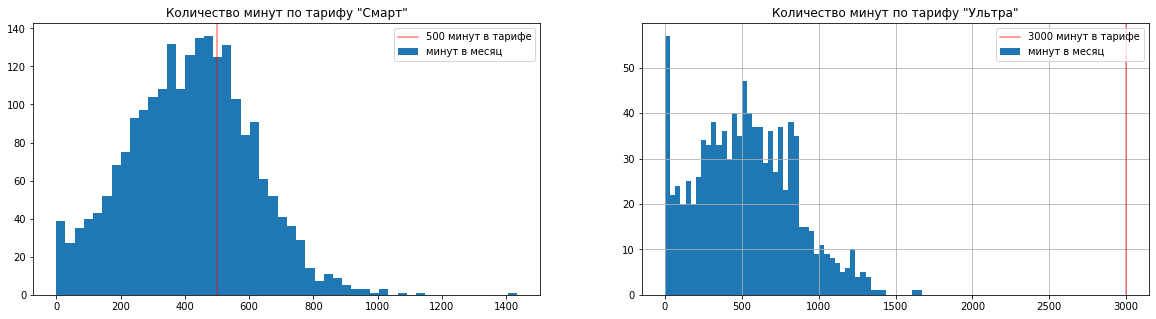

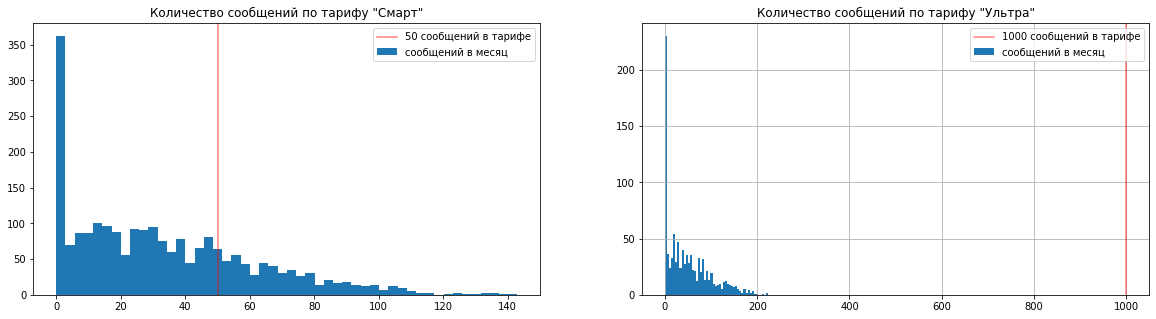

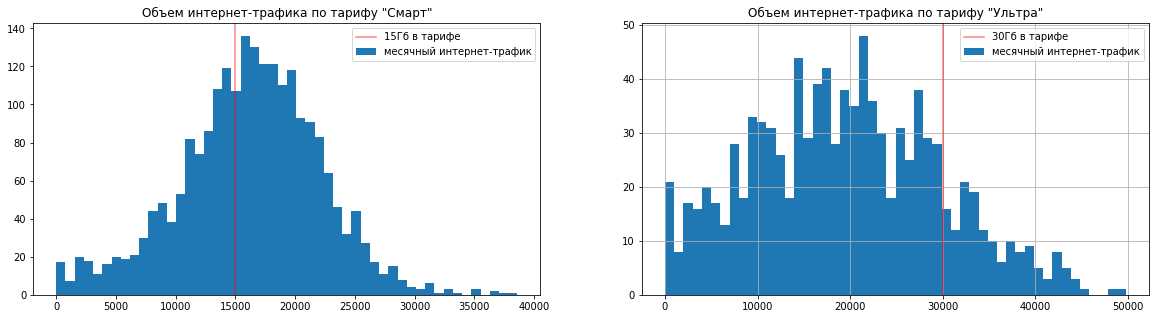

In [31]:
def show_subgraphs(query_1, query_2, 
                   title_1=False, title_2=False, 
                   legend_1=False, legend_2=False,
                   line_1=False, line_2=False,
                   bins_count=20, line=False, grid=False):
    
    fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    
    ax_1.hist(query_1, bins=bins_count)
    ax_2.hist(query_2, bins=bins_count)
    
    if line_1:
        ax_1.axvline(x=line_1, linestyle='-', color='r', alpha=0.5)
        
    if title_1:
        ax_1.title.set_text(title_1)
        
    if line_2:
        ax_2.axvline(x=line_2, linestyle='-', color='r', alpha=0.5)
        
    if title_2:
        ax_2.title.set_text(title_2)
        
    if legend_1:
        ax_1.legend(legend_1, loc='upper right')
    
    if legend_2:
        ax_2.legend(legend_2, loc='upper right')
        
    ax_2.grid(True)
    ax_2.grid(True)
    
show_subgraphs(query_1=smart_duration_query, query_2=ultra_duration_query, 
               title_1='Количество минут по тарифу "Смарт"', title_2='Количество минут по тарифу "Ультра"', 
               legend_1=['500 минут в тарифе', 'минут в месяц'], legend_2=['3000 минут в тарифе', 'минут в месяц'],
               line_1=500, line_2=3000,
               bins_count=50, line=True, grid=True)

show_subgraphs(query_1=smart_messages_query, query_2=ultra_messages_query, 
               title_1='Количество сообщений по тарифу "Смарт"', title_2='Количество сообщений по тарифу "Ультра"', 
               legend_1=['50 сообщений в тарифе', 'сообщений в месяц'], legend_2=['1000 сообщений в тарифе', 'сообщений в месяц'],
               line_1=50, line_2=1000,
               bins_count=50, line=True, grid=True)

show_subgraphs(query_1=smart_traffic_query, query_2=ultra_traffic_query, 
               title_1='Объем интернет-трафика по тарифу "Смарт"', title_2='Объем интернет-трафика по тарифу "Ультра"', 
               legend_1=['15Гб в тарифе', 'месячный интернет-трафик'], legend_2=['30Гб в тарифе', 'месячный интернет-трафик'],
               line_1=15_000, line_2=30_000,
               bins_count=50, line=True, grid=True)


plt.show()

По распределениям видно что большей части абонентов тарифа "Смарт" достаточно минут в пакете. Абоненты тарифа "Ультра" не выговаривают свой лимит. \
Судя по количеству сообщений абоненты обоих тарифов предпочитают пользоваться мессенджерами или соцсетями. \
Распределение объема интернет-трафика показывает, что абоненты тарифа "Смарт" пользуются дополнительными пакетами. Абонентам тарифа "Ультра" лимита в пакете достаточно.

In [32]:
def show_distr(query, tariff_name, cdf_value, ppf_value, value_text):
    distr = st.norm(query.mean(), query.std())
    
    print(f'Вероятность уложиться в пакет {value_text} пользователю тарифа "{tariff_name}": {distr.cdf(cdf_value):0.2%}')
    print(f'Количество {value_text} достаточное для 80% абонетнов тарифа "{tariff_name}": {round(distr.ppf(ppf_value)):0.0f} {value_text}')

show_distr(smart_duration_query, "Смарт", 500, 0.8, 'минут')
print()
show_distr(smart_messages_query, "Смарт", 50, 0.8, 'сообщений')
print()
show_distr(smart_traffic_query, "Смарт", 15_000, 0.8, 'Гб')
print()
show_distr(ultra_duration_query, "Ультра", 3_000, 0.8, 'минут')
print()
show_distr(ultra_messages_query, "Ультра", 1_000, 0.8, 'сообщений')
print()
show_distr(ultra_traffic_query, "Ультра", 30_000, 0.8, 'Гб')

Вероятность уложиться в пакет минут пользователю тарифа "Смарт": 66.71%
Количество минут достаточное для 80% абонетнов тарифа "Смарт": 578 минут

Вероятность уложиться в пакет сообщений пользователю тарифа "Смарт": 72.21%
Количество сообщений достаточное для 80% абонетнов тарифа "Смарт": 57 сообщений

Вероятность уложиться в пакет Гб пользователю тарифа "Смарт": 41.78%
Количество Гб достаточное для 80% абонетнов тарифа "Смарт": 21176 Гб

Вероятность уложиться в пакет минут пользователю тарифа "Ультра": 100.00%
Количество минут достаточное для 80% абонетнов тарифа "Ультра": 794 минут

Вероятность уложиться в пакет сообщений пользователю тарифа "Ультра": 100.00%
Количество сообщений достаточное для 80% абонетнов тарифа "Ультра": 90 сообщений

Вероятность уложиться в пакет Гб пользователю тарифа "Ультра": 85.12%
Количество Гб достаточное для 80% абонетнов тарифа "Ультра": 27976 Гб


Большей половины абонентов тарифа "Смарт" достаточно пакета минут и почти всем хватает пакета сообщений. Объема интернет-трафика недостаточно для абонентов тарифа.

Всем абонентам тарифа "Ультра" достаточно пакета минут и сообщений. Количество минут и сообщений избыточно в данном тарифе. Объем интернет-трафика достаточен для большинства абонентов тарифа.

Данные показывают, что смс сообщения не являются основным средством общения для абонентов обоих тарифов. 

## 4. Проверка гипотез

### 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [33]:
smart_month_revenue = all_stats.query('tariff_name == "smart"')['month_revenue']
ultra_month_revenue = all_stats.query('tariff_name == "ultra"')['month_revenue']
alpha_month_revenue = 0.05
month_revenue_ttest = st.ttest_ind(smart_month_revenue, ultra_month_revenue)

print('p-значение:', month_revenue_ttest.pvalue)

if (month_revenue_ttest.pvalue < alpha_month_revenue):
    print('Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается')
else: 
    print('Не удалось подтвердить различие средней выручки пользователей тарифов «Ультра» и «Смарт»')

p-значение: 1.7023268870439853e-158
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается


Нулевая гипотеза: средняя выручка пользователей тарифов "Смарт" и "Ультра" равны. \
Альтернативная гипотеза: средняя выручка пользователей тарифов "Смарт" и "Ультра" различаются.

In [34]:
moscow_month_revenue = all_stats.query('city == "Москва"')['month_revenue']
regions_month_revenue = all_stats.query('city != "Москва"')['month_revenue']
alpha_month_revenue = 0.05
moscow_revenue_ttest = st.ttest_ind(moscow_month_revenue, regions_month_revenue)

print('p-значение', moscow_revenue_ttest.pvalue)

if (moscow_revenue_ttest.pvalue < alpha_month_revenue):
    print('Средняя выручка пользователей из Москвы отличается от выручки из других регионов')
else:
    print('Не выявлено отличие средней выручки пользователей из Москвы от выручки из других регионов')

p-значение 0.5277299573181309
Не выявлено отличие средней выручки пользователей из Москвы от выручки из других регионов


Нулевая гипотеза: средняя выручка пользователей из Москва равна средней выручке пользователей из регионов. \
Альтернативная гипотеза: средняя выручка пользователей из Москвы и регионов различается.

Для проверки гипотез использовался критерий Уэлча, так как данные выборки независимы и имеют разные дисперcии.

## 5. Общий вывод

In [35]:
print(f'Средняя выручка пользователей тарифа "Смарт": {round(smart_month_revenue.mean()):0.0f}')
print(f'Средняя выручка пользователей тарифа "Ультра": {round(ultra_month_revenue.mean()):0.0f}')

Средняя выручка пользователей тарифа "Смарт": 1294
Средняя выручка пользователей тарифа "Ультра": 2071


In [36]:
print(f'Средняя выручка пользователей из Москвы: {round(moscow_month_revenue.mean()):0.0f}')
print(f'Средняя выручка пользователей из регионов: {round(regions_month_revenue.mean()):0.0f}')

Средняя выручка пользователей из Москвы: 1551
Средняя выручка пользователей из регионов: 1528


Выявлено различие в выручке пользователей тарифов "Ультра" и "Смарт". Пользователи тарифа "Ультра" приносят больше денег, в то время как пользователей тарифа "Смарт" больше и такие пользователи создают более предсказуемую нагрузку. \
Различие средней выручки абоненов Москвы и других регионов не подверждено. 

Так же исследование показало что смс как средство общение почти не используется абонентами обоих тарифов, а пакета миниту сотовой связи достаточно для большинства абонентов тарифа "Смарт" и всех абонентов тарифа "Ультра". 

Тариф "Ультра" является более выгодным для компании "Мегалайн".